In [1]:
# warmup week 4: Balancing CLassification Rates

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


def read_titanic_data(url):
  df = pd.read_csv(url)
  y = df["Survived"]
  X = df.drop(["Survived", "Name"], axis = 1)
  return df, X, y

train_url = "https://raw.githubusercontent.com/middlebury-csci-0451/CSCI-0451/main/data/titanic/train.csv"

df_train, X_train, y_train = read_titanic_data(train_url)

df_train.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,1,2,Mrs. (Elizabeth Ramell) Nye,female,29.0,0,0,10.500
1,0,3,Master. Harald Skoog,male,4.0,3,2,27.900
2,0,3,Miss. Ebba Iris Alfrida Andersson,female,6.0,4,2,31.275
3,0,3,Mr. Frank John Goldsmith,male,33.0,1,1,20.525
4,0,3,Mr. Achille Waelens,male,22.0,0,0,9.000


In [2]:
X_train = pd.get_dummies(X_train, columns = ["Sex"], drop_first = "if_binary")
X_train.head()

,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Sex_male
0,2,29.0,0,0,10.500,0
1,3,4.0,3,2,27.900,1
2,3,6.0,4,2,31.275,0
3,3,33.0,1,1,20.525,1
4,3,22.0,0,0,9.000,1


In [3]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(X_train, y_train)
LR.score(X_train, y_train)

0.7968970380818053

In [4]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

def poly_LR(deg):
  return Pipeline([("poly", PolynomialFeatures(degree = deg)),
                   ("LR", LogisticRegression(penalty = "none", max_iter = int(1e3)))])


plr = poly_LR(3)
plr.fit(X_train, y_train)
plr.score(X_train, y_train)

/Users/ndang/opt/anaconda3/envs/ml-0451/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/ndang/opt/anaconda3/envs/ml-0451/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7842031029619182

In [5]:
test_url = "https://raw.githubusercontent.com/middlebury-csci-0451/CSCI-0451/main/data/titanic/test.csv"

df_test, X_test, y_test = read_titanic_data(test_url)
X_test = pd.get_dummies(X_test, columns = ["Sex"], drop_first="if_binary")

plr.score(X_test, y_test).round(4)

0.8258

In [6]:
from sklearn.metrics import confusion_matrix
y_pred = plr.predict(X_test)

confusion_matrix(y_test, y_pred)

array([[99, 15],
       [16, 48]])

In [7]:
def compute(y_pred, y_test):
    count_fp = 0
    count_fn = 0
    count_tp = 0
    count_tn = 0

    for i in range(len(y_pred)):
        if y_pred[i] == 1 & y_test[i] == 0:
            count_fp += 1
        if y_pred[i] == 0 & y_test[i] == 1:
            count_fn += 1
        if y_pred[i] == 1 & y_test[i] == 1:
            count_tp += 1
        if y_pred[i] == 0 & y_test[i] == 0:
            count_tn += 1
        
    fpr = count_fp / (count_fp + count_tn)
    fnr = count_fn / (count_fn + count_tp) 
    ppv = count_tp / (count_tp + count_fp)
    p = (count_fn + count_tp) / (count_tn + count_fp + count_fn + count_tp)

    fpr_2 = (p / (1 - p)) * ((1 - ppv) / ppv) * (1 - fnr) 
    t = (fpr, fpr_2)
    return t

compute(y_pred, y_test)


(0.46261682242990654, 0.46261682242990665)

In [8]:
#Linear regression warm up
import numpy as np

def pad(X):
    return np.append(X, np.ones((X.shape[0], 1)), 1)

X = np.random.rand(10, 3)
X = pad(X)
w = np.random.rand(X.shape[1])

y = X@w + np.random.randn(X.shape[0])

def predict(X, w):
    return X@w

def score(X,y,w):
    y_bar = y.mean()
    y_hat = predict(X,w)

    top = ((y_hat - y) ** 2 ).sum()
    bottom = ((y_bar - y) ** 2 ).sum()
    c = 1 - (top / bottom)

    return c

score(X, y, w)


0.0694046000870302

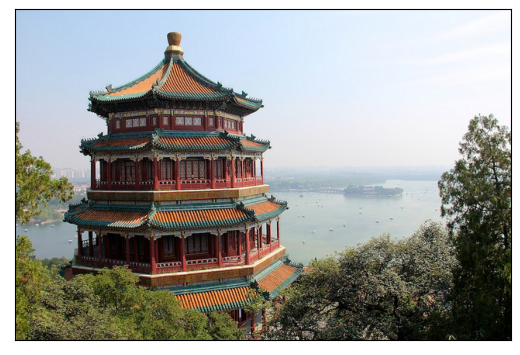

In [9]:
#warm up 4/3

# Note: this requires the ``pillow`` package to be installed
from sklearn.datasets import load_sample_image
china = load_sample_image("china.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(china);

In [10]:
data = china / 255.0 # use 0...1 scale
data = data.reshape(427 * 640, 3)
data.shape

(273280, 3)

In [11]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data
    
    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);

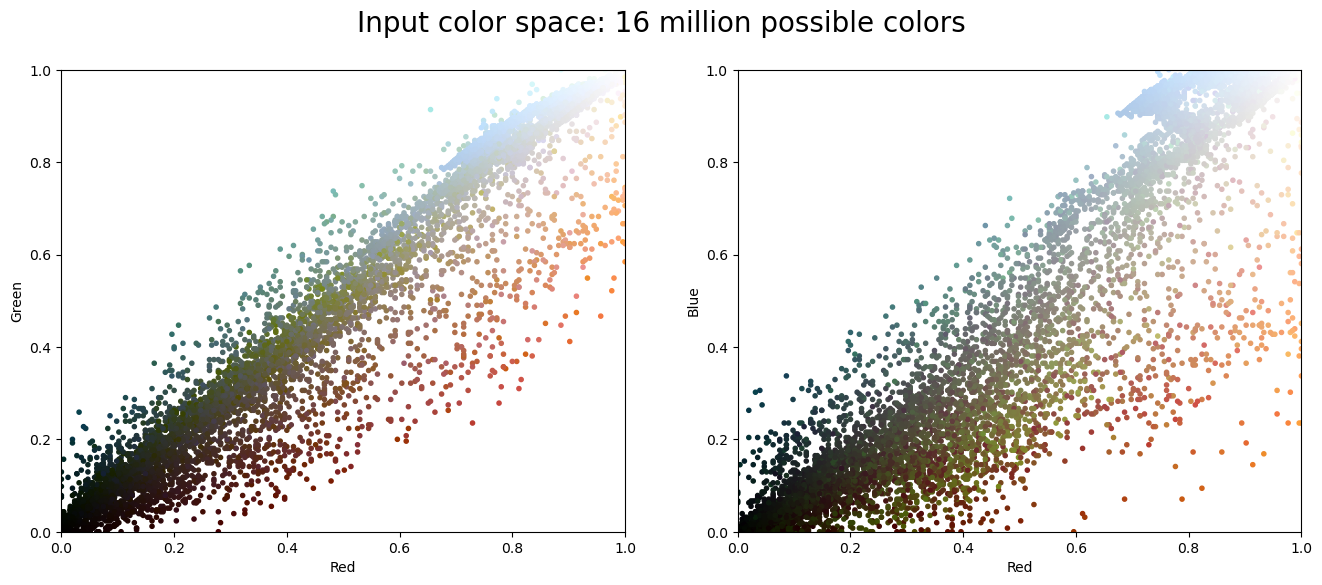

In [12]:
plot_pixels(data, title='Input color space: 16 million possible colors')

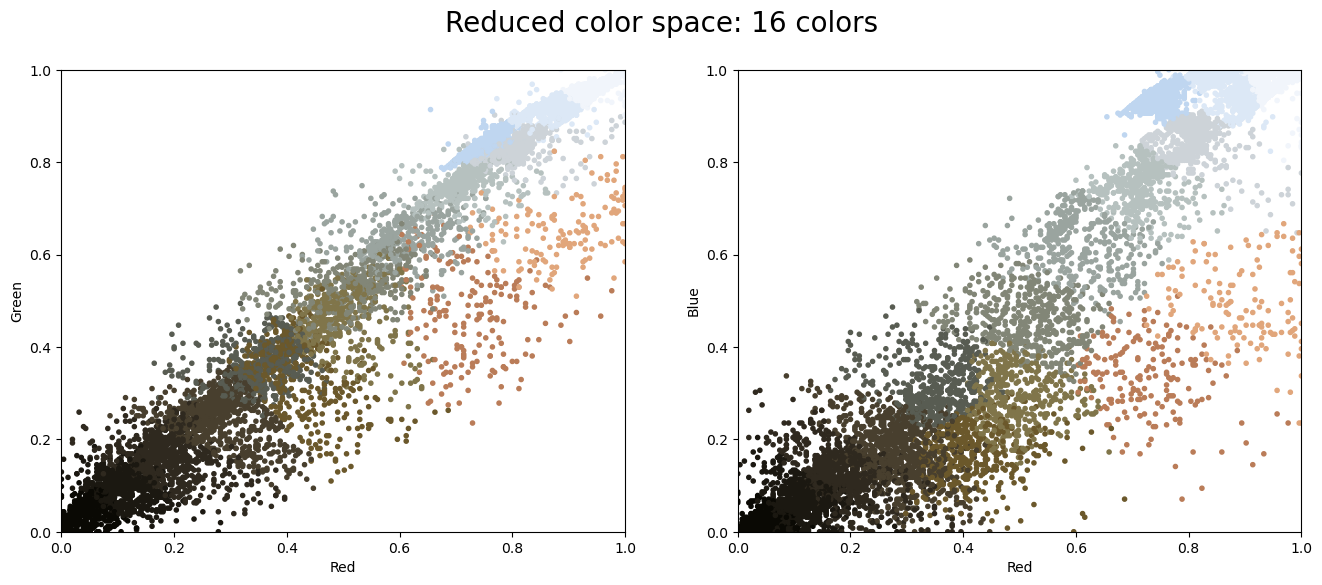

In [13]:
import warnings; warnings.simplefilter('ignore')  # Fix NumPy issues.

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors,
            title="Reduced color space: 16 colors")

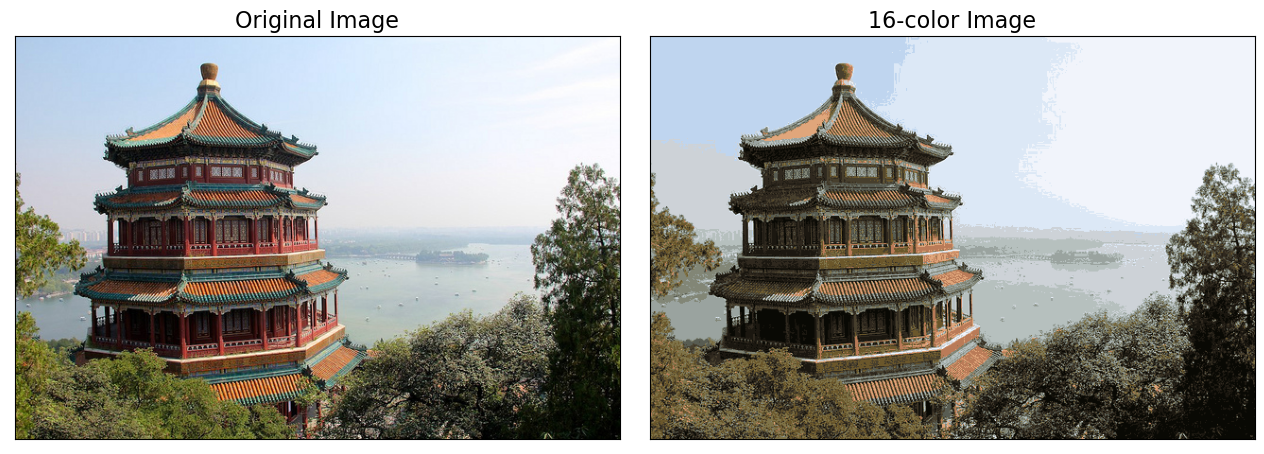

In [14]:
china_recolored = new_colors.reshape(china.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(china)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(china_recolored)
ax[1].set_title('16-color Image', size=16);